In [6]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [7]:
DATA_PATH = Path.cwd().parent.joinpath('data', 'processed')

returns_data = pd.read_table(DATA_PATH.joinpath('visualization', 'performance_data.txt'), parse_dates={'date': ['year', 'month']})
weights_data = pd.read_table(DATA_PATH.joinpath('visualization', 'weights_data.txt'), parse_dates={'date': ['year', 'month']})
weights_data = weights_data.fillna(0)

In [3]:
mean = returns_data.actual_ret.mean()
std = returns_data.actual_ret.std()
print(f'Actual:\t\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

mean = returns_data.expected_ret.mean()
std = returns_data.expected_ret.std()
print(f'Expected:\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

mean = returns_data.sharpe.mean()
std = returns_data.sharpe.std()
print(f'Sharpe Ratio:\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

Actual:		0.0476 (0.1699) (-0.2854, 0.3806)
Expected:	0.3307 (0.2522) (-0.1635, 0.8250)
Sharpe Ratio:	0.3444 (0.2061) (-0.0595, 0.7484)


### Actual and Expected Returns

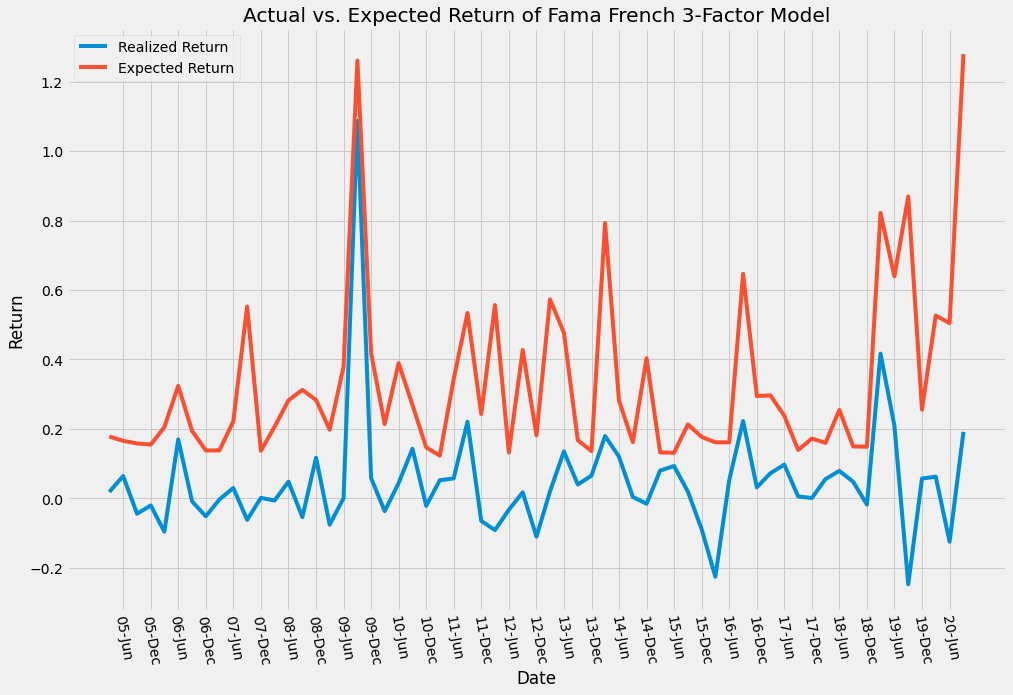

In [4]:
fig = plt.figure(figsize=(15,10))
plt.plot(returns_data.date, returns_data.actual_ret, label='Realized Return')
plt.plot(returns_data.date, returns_data.expected_ret, label='Expected Return')
plt.title('Actual vs. Expected Return of Fama French 3-Factor Model')
plt.legend()
plt.ylabel('Return')
plt.xlabel('Date')
plt.xticks(returns_data.date[1::2], labels=returns_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)
plt.show()

In [17]:
returns_data.mean()

<ipython-input-17-d1241bbb8760>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  returns_data.mean()


actual_ret      0.047571
expected_ret    0.330742
sharpe          0.344445
dtype: float64

In [18]:
returns_data.std()

date            1673 days 19:24:36.267357568
actual_ret                          0.169891
expected_ret                        0.252179
sharpe                              0.206115
dtype: object

### Portfolio Alpha

In [8]:
alphas = list()
for dt in weights_data.date:
    file = dt.strftime('%Y.%m.txt')
    df = pd.read_table(DATA_PATH.joinpath('factor_data', 'alphas', file))
    subset = weights_data[weights_data.date==dt].drop('date', axis=1).T
    subset.columns = ['weight']
    subset = subset.merge(df, how='left', left_index=True, right_on='tic')
    subset = subset[subset.weight!=0]
    a = (subset.weight * subset.alpha).sum()
    alphas.append(a)

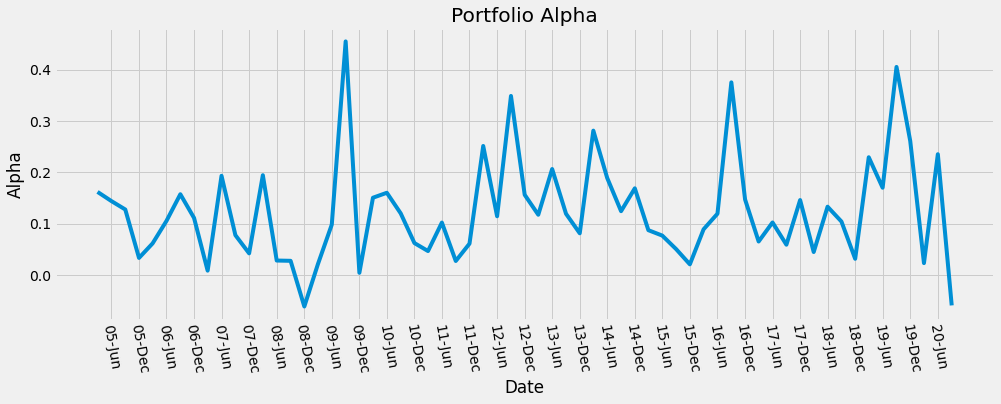

In [9]:
fig = plt.figure(figsize=(15,5))
plt.plot(weights_data.date, alphas)
plt.title('Portfolio Alpha')
plt.ylabel('Alpha')
plt.xlabel('Date')
plt.xticks(weights_data.date[1::2], labels=weights_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)
plt.show()

### Correlation

In [150]:
returns_data.corr()

,actual_ret,expected_ret,sharpe
actual_ret,1.000000,0.324174,-0.103559
expected_ret,0.324174,1.000000,-0.124064
sharpe,-0.103559,-0.124064,1.000000


In [16]:
offset = 4
np.corrcoef(returns_data.actual_ret[offset:], returns_data.expected_ret[:-offset])

array([[1.        , 0.10622138],
       [0.10622138, 1.        ]])